In [1]:
#import required libs 
import numpy as np
import os
import matplotlib.pyplot as plt

from skimage.io import imread
from sklearn.metrics import classification_report, confusion_matrix
from sklearn .model_selection import train_test_split

import glob
import keras
import keras.backend as K
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report


Using TensorFlow backend.


# Preparation 

## Importing Data

The dataset contains three main folders : color (Original RGB images), grayscale (grayscaled version of the raw images), segmented (RGB images with just the leaf segmented and color corrected). 

Each folder is splited to many folders, where each one corresponds to set of images (healthy or disease) for each plant (Potato , Apple corn, grape, tomato etc. ) in this tutorial only grape and tomato will be studied

In [2]:
# Defining the main path for both Grape and Tomato 
Path_grape = './Diseases/grape'


In [3]:
%pwd

'C:\\Users\\bmakh\\Projects\\CNN_plants_disease'

## 1- Grape dataset 
### 1.1-  Cleaning dataset 
#### Cleaning the data and reorganizing them 

In [4]:
# # this cell to be run if you have the row data and must be run only one time 
folders= ['Black_rot','Esca_(Black_Measles)', 'healthy', 'Leaf_blight']
# for folder in folders:
#     path=Path_grape+'/color/'+folder
#     path1=Path_grape+'/grayscale/'+folder 
     
#     for i, img in enumerate(os.listdir(path)): 
#         name=str(i)+'_'+folder+'.JPG'
#         os.rename(path+'/'+img, path+'/'+name)
#         os.rename(path1+'/'+img, path1+'/'+name)      

In [5]:
# # # segmented image must be renamed separetly         
# for folder in folders:
#     path2=Path_grape+'/segmented/'+folder
#     for i, img in enumerate(os.listdir(path2)):
#         name=str(i)+'_'+folder+'.JPG'
#         os.rename(path2+'/'+img, path2+'/'+name)

### 1.2- Reading Dataset 

In [6]:
#Read Gray dataset
Gray_images = []
for im in glob.glob(Path_grape+"/grayscale/*/*.JPG"):
    Gray_images.append(im.split('\\')[2])

#Read Segmented dataset
Seg_images = []
for im in glob.glob(Path_grape+"/segmented/*/*.JPG"):
    Seg_images.append(im.split('\\')[2])

 ### 1.3- Plotting some examples of my dataset 

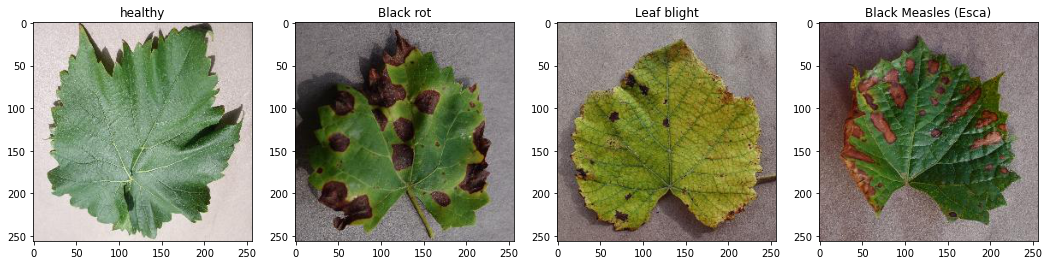

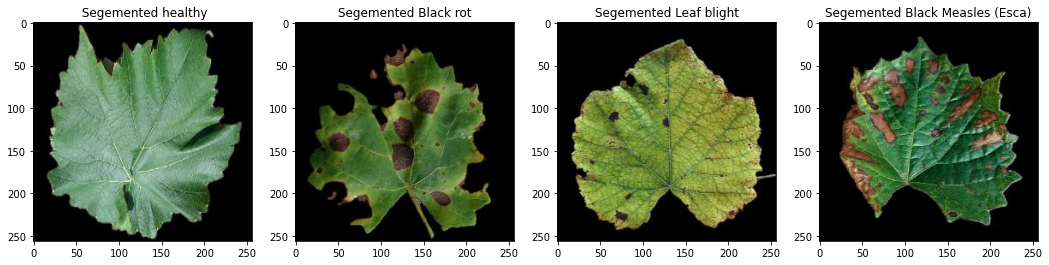

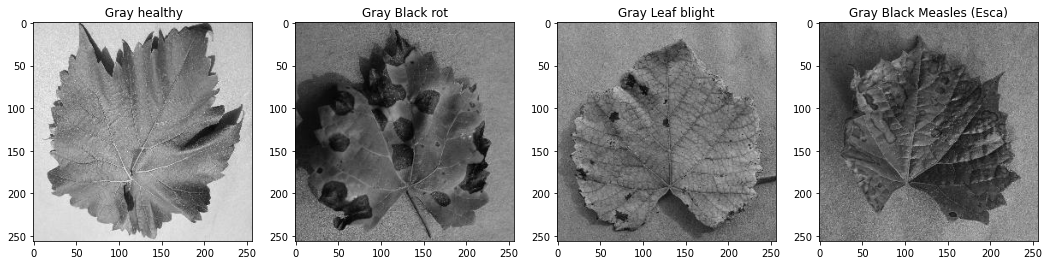

In [7]:


plt.figure(figsize=(18,13))
plt.subplot(1,4,1)
plt.title("healthy")
plt.imshow(imread(Path_grape+'/color/healthy/2_healthy.JPG'))
plt.subplot(1,4,2)
plt.title("Black rot")
plt.imshow(imread(Path_grape+'/color/Black_rot/27_Black_rot.JPG'))
plt.subplot(1,4,3)
plt.title("Leaf blight")
plt.imshow(imread(Path_grape+'/color/Leaf_blight/16_Leaf_blight.JPG'))
plt.subplot(1,4,4)
plt.title("Black Measles (Esca)")
plt.imshow(imread(Path_grape+'/color/Esca_(Black_Measles)/42_Esca_(Black_Measles).JPG'))
plt.show()


plt.figure(figsize=(18,13))
plt.subplot(1,4,1)
plt.title(" Segemented healthy")
plt.imshow(imread(Path_grape+'/segmented/healthy/2_healthy.JPG'))
plt.subplot(1,4,2)
plt.title("Segemented Black rot")
plt.imshow(imread(Path_grape+'/segmented/Black_rot/27_Black_rot.JPG'))
plt.subplot(1,4,3)
plt.title("Segemented Leaf blight")
plt.imshow(imread(Path_grape+'/segmented/Leaf_blight/16_Leaf_blight.JPG'))
plt.subplot(1,4,4)
plt.title("Segemented Black Measles (Esca)")
plt.imshow(imread(Path_grape+'/segmented/Esca_(Black_Measles)/42_Esca_(Black_Measles).JPG'))
plt.show()


plt.figure(figsize=(18,13))
plt.subplot(1,4,1)
plt.title(" Gray healthy")
plt.imshow(imread(Path_grape+'/grayscale/healthy/2_healthy.JPG'))
plt.subplot(1,4,2)
plt.title("Gray Black rot")
plt.imshow(imread(Path_grape+'/grayscale/Black_rot/27_Black_rot.JPG'))
plt.subplot(1,4,3)
plt.title("Gray Leaf blight")
plt.imshow(imread(Path_grape+'/grayscale/Leaf_blight/16_Leaf_blight.JPG'))
plt.subplot(1,4,4)
plt.title("Gray Black Measles (Esca)")
plt.imshow(imread(Path_grape+'/grayscale/Esca_(Black_Measles)/42_Esca_(Black_Measles).JPG'))
plt.show()

### 1.4- Assigning each class to its label 

In [31]:
# # Here is how classes are going to be mapped : 
# Healthy==> 0
# Black rot ==> 1
# Black Measles==> 2
# leaf blight ==> 3 
# ['0', '1', '2', '3']==> ['healthy','Black','Esca','Leaf' ]
Labels=['0', '1', '2', '3']
#load everything into memory

General_path=Path_grape

x=[] #==> dataset 
y=[] #==> label 
#Read colored dataset
Input_images = []
for fold in folders: 
        for  i, im in enumerate(glob.glob(Path_grape+"/color/"+fold+'/*.JPG')):
            
            if fold=='healthy': 
                class_lab=0

            if fold=='Black_rot': 
                class_lab=1

            if fold=='Esca_(Black_Measles)': 
                class_lab=2

            if fold=='Leaf_blight': 
                class_lab=3

            #Input_images.append(im.split('\\')[2])  

            image = load_img(im,target_size=(64,64))
            image = img_to_array(image)/255.
            x.append(image)
            y.append(class_lab)

In [32]:
classes_note=y
# converting the dim of my labels array from (1,) to (6,)
x=np.array(x)
#print(x)
y=to_categorical(y)
#y

### 1.5- Splliting data set to trainin, validation and testing 

In [10]:
x_train, _x, y_train, _y = train_test_split(x,y,test_size=0.2, stratify = y, random_state = 1)
x_valid,x_test, y_valid, y_test = train_test_split(_x,_y,test_size=0.4, stratify = _y, random_state = 1)

# x_train=np.array(x_train)
# x_test=np.array(x_test)
# y_train=np.array(y_train)
# y_test=np.array(y_test)
# x_valid=np.array(x_valid)
# y_valid=np.array(y_valid)

print("train data:",x_train.shape,y_train.shape)
print("validation data:",x_valid.shape,y_valid.shape)
print("test data:",x_test.shape,y_test.shape)

train data: (3249, 64, 64, 3) (3249, 4)
validation data: (487, 64, 64, 3) (487, 4)
test data: (326, 64, 64, 3) (326, 4)


In [11]:
# trdata = ImageDataGenerator()
# traindata = trdata.flow_from_directory(directory="data",target_size=(224,224))
# tsdata = ImageDataGenerator()
# testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

#since there is no validation_split parameter, 
# you can create two different ImageDataGenerator flow, one for training and one for validating

#we will define a generator class for training data and validation data seperately, 
# as no augmentation is not required for validation data

trdata = ImageDataGenerator(rotation_range=90,horizontal_flip=True)
vldata = ImageDataGenerator()
train_data = trdata.flow(x_train,y_train,batch_size=98)
valid_data = vldata.flow(x_valid,y_valid,batch_size=98)

In [12]:
#utilize early stopping function to stop at the lowest validation loss
es = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')# loss over validation set is the monitored metric 
# patience over 10 epochs before stop the training when no improvement is existing 
# mode auto, the direction is automatically inferred from the name of the monitored quantity.


In [13]:
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 3)

# Confusion Matrix 

In [14]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
classes=['healthy','Black Rot','Esca','Leaf blight' ]
def Calculate_confMatrix (y_t, y_p, normalize=False): 
    cm = confusion_matrix(y_t, y_p)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    return cm 


def plot_confusionMatrix(conf_mat_normalized):
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(conf_mat_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat_normalized.shape[1]),
           yticks=np.arange(conf_mat_normalized.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Normalized confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = conf_mat_normalized.max() / 2.
    for i in range(conf_mat_normalized.shape[0]):
        for j in range(conf_mat_normalized.shape[1]):
            ax.text(j, i, format(conf_mat_normalized[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat_normalized[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    
    
np.set_printoptions(precision=2)


# 2 - Models 

## 1.2- Single convolution layer NN 

### 1.2.1- Single layer model preparation 

In [15]:
#Let's we try this smaller CNN with single Convolution layer 


cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.4))
cnn1.add(Flatten())
cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(4, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### 1.2.2- Single layer model training 

In [16]:
ckpt_single = ModelCheckpoint("./Saved_models/GrapeSingle.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
history_single = cnn1.fit_generator(train_data,steps_per_epoch = train_data.n // 98, callbacks = [es,ckpt_single], 
    validation_data = valid_data, validation_steps = valid_data.n // 98,epochs=50)

# the // sign keeps only the integer part 
#es is early stopping 
# ckpt is the model check point  


Epoch 1/50
33/33 [==============================] - 10s 307ms/step - loss: 1.4026 - accuracy: 0.4916 - val_loss: 0.9351 - val_accuracy: 0.5179

Epoch 00001: val_loss improved from inf to 0.93512, saving model to ./Saved_models/GrapeSingle.hdf5
Epoch 2/50
33/33 [==============================] - 10s 305ms/step - loss: 0.7539 - accuracy: 0.6804 - val_loss: 0.7633 - val_accuracy: 0.6735

Epoch 00002: val_loss improved from 0.93512 to 0.76334, saving model to ./Saved_models/GrapeSingle.hdf5
Epoch 3/50
33/33 [==============================] - 10s 299ms/step - loss: 0.6226 - accuracy: 0.7461 - val_loss: 0.6727 - val_accuracy: 0.6915

Epoch 00003: val_loss improved from 0.76334 to 0.67270, saving model to ./Saved_models/GrapeSingle.hdf5
Epoch 4/50
33/33 [==============================] - 10s 314ms/step - loss: 0.5367 - accuracy: 0.7826 - val_loss: 0.7881 - val_accuracy: 0.6632

Epoch 00004: val_loss did not improve from 0.67270
Epoch 5/50
33/33 [==============================] - 11s 345ms/st

### 1.2.3- Single Layer model Prediction

In [17]:

#true label
y_true_single = np.argmax(y_test,axis=1)

#prediction label
Y_pred_single = cnn1.predict(x_test)
y_pred_single = np.argmax(Y_pred_single, axis=1)

#print(y_true_single)
#print(y_pred_single)


### 1.2.4- Single layer model evaluation 

In [18]:
#load the best saved model with lowest validation loss from the predefined file 
cnn1.load_weights("./Saved_models/GrapeSingle.hdf5")
#check the model metrics
print(cnn1.metrics_names)
#evaluate training data
print(cnn1.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print(cnn1.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print(cnn1.evaluate(x= x_test, y = y_test))      

['loss', 'accuracy']
3249/3249 [==============================] - 5s 2ms/step
[0.5039378589356852, 0.7943982481956482]
487/487 [==============================] - 1s 2ms/step
[0.48916604460142477, 0.7802874445915222]
326/326 [==============================] - 0s 1ms/step
[0.4510330903383852, 0.8159509301185608]


### 1.2.5- Single layer Confusion matrix 

Normalized confusion matrix


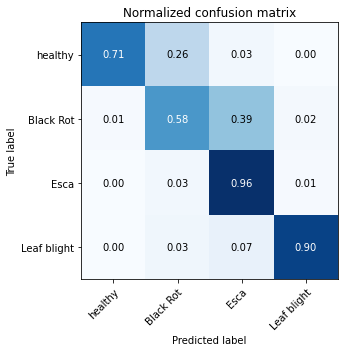

In [19]:
CM_single=Calculate_confMatrix(y_true_single, y_pred_single, normalize=True)
plot_confusionMatrix(CM_single)

In [35]:
# ['0', '1', '2', '3']==> ['healthy','Black','Esca','Leaf' ]
healthy_n=classes_note.count(0)
Black_n=classes_note.count(1)
Esca_n=classes_note.count(2)
Leaf_n=classes_note.count(3)

In [36]:
healthy_n

423

## 1.3- 3-Conv CNN 

### 1.3.1- 3-Conv layer model preparation 

In [22]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.2))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.4)) # 0.3
cnn3.add(Dense(4, activation='softmax'))

cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

### 1.3.2- 3-Conv layer model training 

In [23]:
ckpt_3Conv = ModelCheckpoint("./Saved_models/Grape3Conv.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history_3conv = cnn3.fit_generator(train_data,steps_per_epoch = train_data.n // 98, callbacks = [es,ckpt_3Conv], 
    validation_data = valid_data, validation_steps = valid_data.n // 98,epochs=50)

# the // sign keeps only the integer part 
#es is early stopping 
# ckpt is the model check point  

Epoch 1/50
33/33 [==============================] - 24s 724ms/step - loss: 1.0997 - accuracy: 0.4938 - val_loss: 0.8516 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.85157, saving model to ./Saved_models/Grape3Conv.hdf5
Epoch 2/50
33/33 [==============================] - 24s 720ms/step - loss: 0.7507 - accuracy: 0.6760 - val_loss: 0.8811 - val_accuracy: 0.5861

Epoch 00002: val_loss did not improve from 0.85157
Epoch 3/50
33/33 [==============================] - 21s 624ms/step - loss: 0.6431 - accuracy: 0.7318 - val_loss: 1.0962 - val_accuracy: 0.5193

Epoch 00003: val_loss did not improve from 0.85157
Epoch 4/50
33/33 [==============================] - 32s 971ms/step - loss: 0.6169 - accuracy: 0.7449 - val_loss: 1.4036 - val_accuracy: 0.5630

Epoch 00004: val_loss did not improve from 0.85157
Epoch 5/50
33/33 [==============================] - 24s 722ms/step - loss: 0.5204 - accuracy: 0.7871 - val_loss: 0.8933 - val_accuracy: 0.6684

Epoch 00005: val_loss did no

### 1.3.3- 3-Conv layer model prediction 

In [24]:
#true label
y_true_3conv = np.argmax(y_test,axis=1)

#prediction label
Y_pred_3conv = cnn3.predict(x_test)
y_pred_3conv = np.argmax(Y_pred_3conv, axis=1)

# print(y_true_3conv)
# print(y_pred_3conv)


### 1.3.4- 3-Conv layer model evaluation 

In [41]:
#load the best saved model with lowest validation loss from the predefined file 
cnn3.load_weights("./Saved_models/Grape3Conv.hdf5")
#check the model metrics
print(cnn3.metrics_names)
#evaluate training data
print('Train:', cnn3.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print('Validation:', cnn3.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print('Test:', cnn3.evaluate(x= x_test, y = y_test))  
# loss: 0.3067 - accuracy: 0.8881 - val_loss: 0.2903 - val_accuracy: 0.8792

['loss', 'accuracy']
3249/3249 [==============================] - 4s 1ms/step
Train: [0.31676803094014716, 0.8661126494407654]
487/487 [==============================] - 1s 1ms/step
Validation: [0.301283846278455, 0.870636522769928]
326/326 [==============================] - 0s 1ms/step
Test: [0.27480516760992857, 0.8865030407905579]


### 1.3.5- 3-Conv layer Confusion matrix 

Normalized confusion matrix


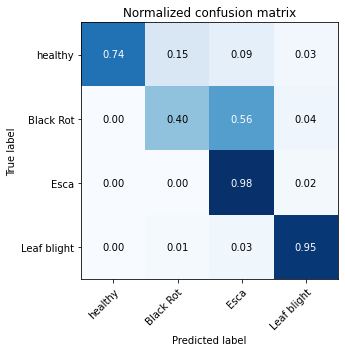

In [26]:
CM_3conv=Calculate_confMatrix(y_true_3conv, y_pred_3conv, normalize=True)
plot_confusionMatrix(CM_3conv)

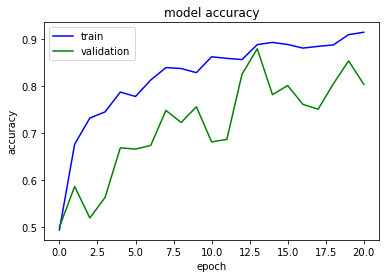

In [39]:
# summarize history for accuracy
plt.plot(history_3conv.history['accuracy'], 'b')
plt.plot(history_3conv.history['val_accuracy'],'g')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

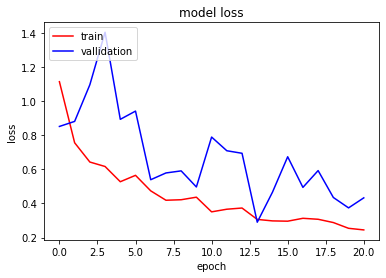

In [40]:
#plt.figure(figsize=(5,5))
plt.plot(history_3conv.history['loss'],'r')
plt.plot(history_3conv.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vallidation'], loc='upper left')
plt.show()

In [38]:
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true_3conv, y_pred_3conv, target_names=classes))

              precision    recall  f1-score   support

     healthy       1.00      0.74      0.85        34
   Black Rot       0.86      0.40      0.55        95
        Esca       0.65      0.98      0.78       111
 Leaf blight       0.92      0.95      0.94        86

    accuracy                           0.78       326
   macro avg       0.86      0.77      0.78       326
weighted avg       0.82      0.78      0.76       326



## 1.4- VGG16 Model results 

### 1.4.1- VGG16 model preparation  

In [42]:
K.clear_session()

nfilter = 32

#VGG16 like model
model = Sequential([
    #block1
    layers.Conv2D(nfilter,(3,3),padding="same",name="block1_conv1",input_shape=(64,64,3)),
    layers.Activation("relu"),
    layers.BatchNormalization(),#improving the speed, performance, and stability of my CNN ,
    #normalize the input layer by re-centering and re-scaling
    layers.Dropout(rate=0.2),   
    
    layers.Conv2D(nfilter,(3,3),padding="same",name="block1_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block1_pool"),
    
    #block2
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block2_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block2_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block2_pool"),
    
    #block3
    layers.Conv2D(nfilter*2,(3,3),padding="same",name="block3_conv1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*4,(3,3),padding="same",name="block3_conv2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    
    layers.Conv2D(nfilter*4,(3,3),padding="same",name="block3_conv3"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2),strides=(2,2),name="block3_pool"),
    #layers.Flatten(),
    layers.GlobalAveragePooling2D(),
    
    #inference layer
    layers.Dense(128,name="fc1"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    #layers.Dropout(rate=0.2),
    
    layers.Dense(128,name="fc2"),
    layers.BatchNormalization(),
    layers.Activation("relu"),    
    #layers.Dropout(rate=0.2),
    
    layers.Dense(4,name="prepredictions"), # the number of labels in my model 
    layers.Activation("softmax",name="predictions")])

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)       

### 1.4.2- VGG16 model training 

In [43]:
ckpt_VGG16 = ModelCheckpoint("GrapeDiseaseVGG16.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history_VGG16 = model.fit_generator(train_data,steps_per_epoch = train_data.n // 50, callbacks = [es,ckpt_VGG16], 
    validation_data = valid_data, validation_steps = valid_data.n // 50,epochs=50)

# the // sign keeps only the integer part 
#es is early stopping 
# ckpt is the model check point  

Epoch 1/50
64/64 [==============================] - 314s 5s/step - loss: 0.4616 - accuracy: 0.8220 - val_loss: 1.4123 - val_accuracy: 0.2651

Epoch 00001: val_loss improved from inf to 1.41229, saving model to GrapeDiseaseVGG16.hdf5
Epoch 2/50
64/64 [==============================] - 326s 5s/step - loss: 0.2668 - accuracy: 0.9029 - val_loss: 4.3470 - val_accuracy: 0.1050

Epoch 00002: val_loss did not improve from 1.41229
Epoch 3/50
64/64 [==============================] - 338s 5s/step - loss: 0.1582 - accuracy: 0.9431 - val_loss: 5.2065 - val_accuracy: 0.1005

Epoch 00003: val_loss did not improve from 1.41229
Epoch 4/50
64/64 [==============================] - 328s 5s/step - loss: 0.1569 - accuracy: 0.9490 - val_loss: 8.7393 - val_accuracy: 0.1096

Epoch 00004: val_loss did not improve from 1.41229
Epoch 5/50
64/64 [==============================] - 322s 5s/step - loss: 0.0994 - accuracy: 0.9654 - val_loss: 6.0896 - val_accuracy: 0.1073

Epoch 00005: val_loss did not improve from 1.4

### 1.4.3- VGG16 model prediction 

In [44]:
#true label
y_true_VGG16 = np.argmax(y_test,axis=1)

#prediction label
Y_pred_VGG16 = model.predict(x_test)
y_pred_VGG16 = np.argmax(Y_pred_VGG16, axis=1)

print(y_true_VGG16)
print(y_pred_VGG16)

[2 2 2 2 3 1 1 2 1 0 2 2 2 2 0 3 3 1 2 0 1 1 3 1 1 3 2 3 2 1 3 3 2 1 1 2 2
 3 2 2 2 1 2 3 2 1 3 3 1 3 1 3 3 3 1 3 1 2 2 1 2 3 2 2 3 1 2 2 2 1 0 3 3 3
 3 3 2 1 1 1 1 1 2 1 1 2 2 3 1 1 0 0 2 3 1 2 3 3 1 1 1 0 0 0 0 1 0 1 1 0 2
 2 2 2 2 2 0 2 3 2 1 3 1 3 1 3 2 2 1 1 1 3 0 2 2 1 3 3 2 1 1 3 1 1 2 3 3 0
 1 2 1 3 3 3 2 2 2 1 2 1 1 3 2 1 1 0 2 2 1 2 3 2 3 2 2 0 1 1 3 0 2 2 1 3 0
 3 1 1 3 3 1 2 1 0 3 1 3 2 1 3 1 2 3 1 0 2 3 1 1 1 3 1 3 2 1 1 3 1 2 2 1 1
 2 2 3 2 2 3 3 2 0 0 3 2 2 2 2 2 0 2 2 0 2 0 2 3 2 1 2 0 3 2 3 3 3 3 2 3 1
 1 2 3 3 1 2 2 1 2 2 0 2 1 0 2 1 0 2 1 1 2 2 3 1 3 3 1 2 2 3 3 3 3 2 2 2 2
 0 2 1 3 2 0 1 3 0 3 2 2 3 1 1 2 0 1 2 1 3 3 3 3 1 2 3 1 2 1]
[3 2 3 2 3 3 3 2 3 0 3 2 3 2 0 3 3 3 3 0 3 3 3 3 0 3 3 3 2 3 3 3 3 2 3 3 2
 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 2 3 3 2 3 2 3 3 3 3 3 3 3 2 3 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 2 3 3 3 3 3 0 0 0 0 3 0 2 3 0 3
 3 3 2 3 2 0 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 0 3 2 3 3 3 2 3 3 3 3 2 2 3 3 0
 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 0 2

### 1.4.4- VGG16 model evaluation 

In [45]:
#load the best saved model with lowest validation loss from the predefined file 
model.load_weights("GrapeDiseaseVGG16.hdf5")
#check the model metrics
print(model.metrics_names)
#evaluate training data
print(model.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print(model.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print(model.evaluate(x= x_test, y = y_test))      

['loss', 'accuracy']
3249/3249 [==============================] - 31s 10ms/step
[1.3951479158022837, 0.2643890380859375]
487/487 [==============================] - 5s 10ms/step
[1.399221200228227, 0.2648870646953583]
326/326 [==============================] - 3s 10ms/step
[1.3960476916260514, 0.2607361972332001]


### 1.4.5- Confusion matrix

Normalized confusion matrix


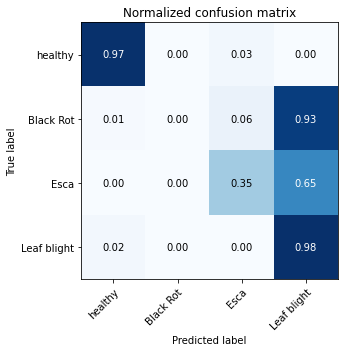

In [46]:
CM_VGG16=Calculate_confMatrix(y_true_VGG16, y_pred_VGG16, normalize=True)
plot_confusionMatrix(CM_VGG16)

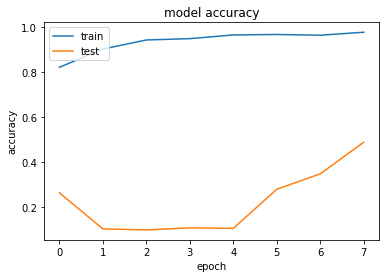

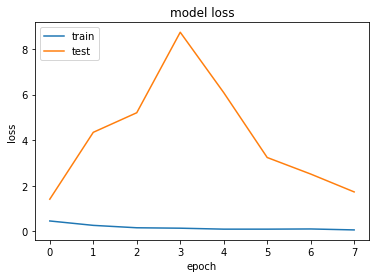

In [47]:
# summarize history for accuracy
plt.plot(history_VGG16.history['accuracy'])
plt.plot(history_VGG16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_VGG16.history['loss'])
plt.plot(history_VGG16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 1.4.6- Predicting unseen Data 

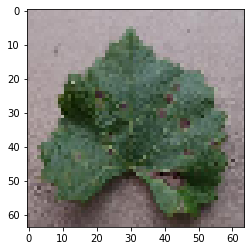

true_label is: 1 : Black Rot
predicted_value is: [0.24 0.26 0.2  0.3 ]
predicted_label is: 3 : Leaf blight
wrong prediction


In [48]:
n = 150 #do not exceed (number of test image - 1)

plt.imshow(x_test[n])
plt.show()

true_label = np.argmax(y_test,axis=1)[n]
print("true_label is:",true_label,":",classes[true_label])
prediction = model.predict(x_test[n][np.newaxis,...])[0]
print("predicted_value is:",prediction)
predicted_label = np.argmax(prediction)
print("predicted_label is:",predicted_label,":",classes[predicted_label])

if true_label == predicted_label:
    print("correct prediction")
else:
    print("wrong prediction")

## 1.5- 4-Conv layer CNN
### 1.5.1- 4-Conv model Preparation 


In [49]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(4, activation='softmax'))

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### 1.5.2- 4-Conv model Training 

In [ ]:
ckpt_cnn4 = ModelCheckpoint("GrapeCNN4.hdf5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

history_cnn4 = cnn4.fit_generator(train_data,steps_per_epoch = train_data.n // 50, callbacks = [es,ckpt_cnn4], 
    validation_data = valid_data, validation_steps = valid_data.n // 50,epochs=50)

# the // sign keeps only the integer part 
#es is early stopping 
# ckpt is the model check point  

### 1.5.3- 4-Conv model Prediction

In [ ]:
#true label
y_true_cnn4 = np.argmax(y_test,axis=1)

#prediction label
Y_pred_cnn4 = cnn4.predict(x_test)
y_pred_cnn4 = np.argmax(Y_pred_cnn4, axis=1)

print(y_true_cnn4)
print(y_pred_cnn4)

### 1.5.4- 4-Conv model Evaluation 

In [ ]:
#load the best saved model with lowest validation loss from the predefined file 
cnn4.load_weights("GrapeDiseaseCNN4.hdf5")
#check the model metrics
print(cnn4.metrics_names)
#evaluate training data
print(cnn4.evaluate(x= x_train, y = y_train))
#evaluate  validation data
print(cnn4.evaluate(x= x_valid, y = y_valid))
#evaluate  test data
print(cnn4.evaluate(x= x_test, y = y_test))      

In [ ]:
print(classification_report(y_true_cnn4, y_pred_cnn4, target_names=classes))

### 1.5.5- 4-Conv model confusion matrix 

In [ ]:
CM_cnn4=Calculate_confMatrix(y_true_cnn4, y_pred_cnn4, normalize=True)
plot_confusionMatrix(CM_cnn4)

### 1.5.6- Predict unseen data 

In [ ]:
n = 150 #do not exceed (number of test image - 1)

plt.imshow(x_test[n])
plt.show()

true_label = np.argmax(y_test,axis=1)[n]
print("true_label is:",true_label,":",classes[true_label])
prediction = cnn4.predict(x_test[n][np.newaxis,...])[0]
print("predicted_value is:",prediction)
predicted_label = np.argmax(prediction)
print("predicted_label is:",predicted_label,":",classes[predicted_label])

if true_label == predicted_label:
    print("correct prediction")
else:
    print("wrong prediction")